# Final Project - Prediksi Gaji

@author : yanamuh (muhamadinah97@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [4]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


### Deskripsi Data

- id - id unique yang dimiliki setiap sample
- Umur - umur yang dimiliki setiap sample
- Kelas Pekerja - kelompok kelas pekerjaan masing-masing sample
- Berat Akhir - berisi nilai akumulasi berdasarkan populasi, ras, dan gender dengan umur 16+ suatu wilayah, sample yang diambil dari wilayah yang memiliki karakteristik demografis yang sama akan memiliki nilai berat akhir yang sama
- Pendidikan - tingkat pendidikan terakhir masing-masing sample
- Jmlh Tahun Pendidikan - berisi jumlah tahun masing-masing sample mengenyam pendidikan
- Status Perkawinan - status perkawinan masing-masing sample
- Pekerjaan - pekerjaan saat ini masing-masing sample
- Jenis Kelamin - jenis kelamin masing-masing sample
- Keuntungan Kapital - keuntungan yang didapat jika sample menjual semua aset miliknya
- Kerugian Kapital - kerugian yang didapat jika sample menjual semua aset miliknya
- Jam per Minggu - jam kerja masing-masing sample setiap minggunya
- Gaji - nilai gaji masing-masing sample apakah kurang dari sama dengan 7jt atau lebih dari 7jt

### Handle missing values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [6]:
df_train.replace('?', np.nan, inplace=True)
df_train.isna().sum()

id                          0
Umur                        0
Kelas Pekerja            2063
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2069
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [7]:
df_test.replace('?', np.nan, inplace=True)
df_test.isna().sum()

id                         0
Umur                       0
Kelas Pekerja            552
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                554
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [8]:
df_train.Gaji.value_counts()

<=7jt    27364
>7jt      8630
Name: Gaji, dtype: int64

In [9]:
# fill the missing values
# Kelas pekerja biasanya berhubungan dengan gaji, 
print(df_train[df_train['Gaji'] == '>7jt']['Kelas Pekerja'].value_counts(),'\n')
print(df_train[df_train['Gaji'] == '<=7jt']['Kelas Pekerja'].value_counts(),'\n')

Wiraswasta                       5420
Pekerja Bebas Bukan Perusahan     789
Pekerja Bebas Perusahaan          708
Pemerintah Lokal                  677
Pemerintah Provinsi               429
Pemerintah Negara                 409
Tanpa di Bayar                      1
Name: Kelas Pekerja, dtype: int64 

Wiraswasta                       19528
Pekerja Bebas Bukan Perusahan     2077
Pemerintah Lokal                  1603
Pemerintah Negara                 1068
Pemerintah Provinsi                637
Pekerja Bebas Perusahaan           565
Tanpa di Bayar                      14
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64 



In [10]:
df_train['Kelas Pekerja'].fillna('Wiraswasta', inplace=True)
df_test['Kelas Pekerja'].fillna('Wiraswasta', inplace=True)

In [11]:
df_train.Pekerjaan.value_counts()

Spesialis                4587
Perbaikan Kerajinan      4507
Ekesekutif Managerial    4481
Pemuka Agama             4158
Sales                    4044
Servis Lainnya           3615
Mesin Inspeksi           2250
Supir                    1741
Pembersih                1540
Petani                   1076
Tech-support             1042
Penjaga                   686
Asisten Rumah Tangga      187
Tentara                    11
Name: Pekerjaan, dtype: int64

In [12]:
df_train['Pekerjaan'].fillna('Spesialis', inplace=True)
df_test['Pekerjaan'].fillna('Spesialis', inplace=True)

In [13]:
df_train.isna().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

### Exploratory data analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

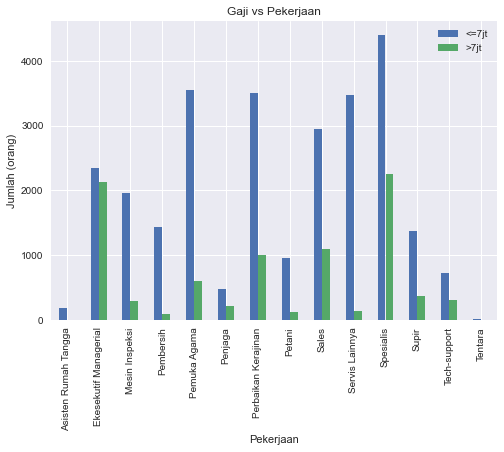

In [15]:
# Pekerjaan
plt.style.use('seaborn')
gaji_pekerjaan = pd.DataFrame(df_train.groupby('Gaji')['Pekerjaan'].value_counts())
gaji_pekerjaan.columns = ['Jumlah']
gaji_pekerjaan.reset_index()
gaji_pekerjaan = gaji_pekerjaan.pivot_table(index='Pekerjaan',columns='Gaji', values='Jumlah')
gaji_pekerjaan_plot = gaji_pekerjaan.plot(kind='bar').set(title='Gaji vs Pekerjaan', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))

Gaji                             <=7jt    >7jt
Kelas Pekerja                                 
Pekerja Bebas Bukan Perusahan   2077.0   789.0
Pekerja Bebas Perusahaan         565.0   708.0
Pemerintah Lokal                1603.0   677.0
Pemerintah Negara               1068.0   409.0
Pemerintah Provinsi              637.0   429.0
Tanpa di Bayar                    14.0     1.0
Tidak Pernah Bekerja               6.0     NaN
Wiraswasta                     21394.0  5617.0


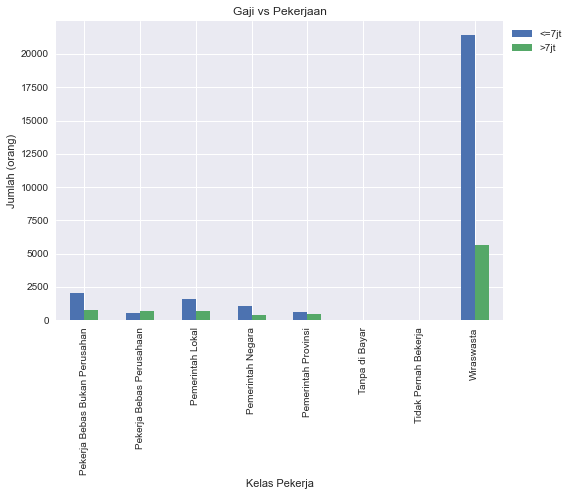

In [16]:
# kelas pekerja
kelas_pekerja = pd.DataFrame(df_train.groupby('Gaji')['Kelas Pekerja'].value_counts())
kelas_pekerja.columns = ['Jumlah']
kelas_pekerja.reset_index()
kelas_pekerja = kelas_pekerja.pivot_table(index='Kelas Pekerja',columns='Gaji', values='Jumlah')

kelas_pekerja_plot = kelas_pekerja.plot(kind='bar').set(title='Gaji vs Pekerjaan', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(kelas_pekerja)

Gaji                  <=7jt  >7jt
Pendidikan                       
10th                    956    68
11th                   1247    68
12th                    443    35
1st-4th                 177     7
5th-6th                 367    21
7th-8th                 636    46
9th                     533    37
D3                      869   306
D4                     1109   391
Doktor                  121   330
Master                  889  1055
Pendidikan Tinggi      6505  1500
SD                       61     1
SMA                    9825  1841
Sarjana                3468  2460
Sekolah Professional    158   464


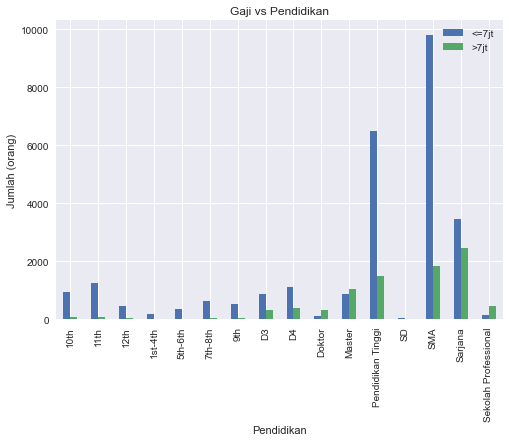

In [17]:
# pendidikan
pendidikan = pd.DataFrame(df_train.groupby('Gaji')['Pendidikan'].value_counts())
pendidikan.columns = ['Jumlah']
pendidikan.reset_index()
pendidikan = pendidikan.pivot_table(index='Pendidikan',columns='Gaji', values='Jumlah')

pendidikan_plot = pendidikan.plot(kind='bar').set(title='Gaji vs Pendidikan', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(pendidikan)

Gaji                   <=7jt  >7jt
Jmlh Tahun Pendidikan             
1                         61     1
2                        177     7
3                        367    21
4                        636    46
5                        533    37
6                        956    68
7                       1247    68
8                        443    35
9                       9825  1841
10                      6505  1500
11                      1109   391
12                       869   306
13                      3468  2460
14                       889  1055
15                       158   464
16                       121   330


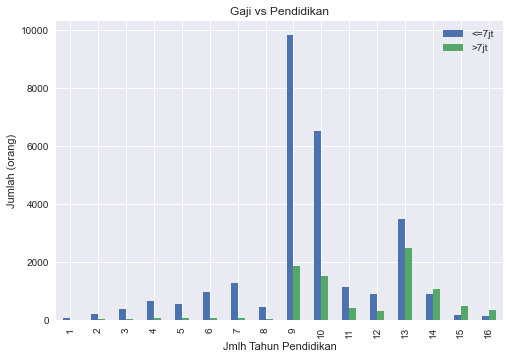

In [18]:
jmlh_thn_pendidikan = pd.DataFrame(df_train.groupby('Gaji')['Jmlh Tahun Pendidikan'].value_counts())
jmlh_thn_pendidikan.columns = ['Jumlah']
jmlh_thn_pendidikan.reset_index()
jmlh_thn_pendidikan = jmlh_thn_pendidikan.pivot_table(index='Jmlh Tahun Pendidikan',columns='Gaji', values='Jumlah')
jmlh_thn_pendidikan_plot = jmlh_thn_pendidikan.plot(kind='bar').set(title='Gaji vs Pendidikan', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(jmlh_thn_pendidikan)

In [19]:
thn_jenis = pd.DataFrame(df_train.groupby('Pendidikan')['Jmlh Tahun Pendidikan'].value_counts())
thn_jenis.columns = ['Jumlah (orang)']
thn_jenis.reset_index(inplace=True)
gabung = pd.merge(thn_jenis,pendidikan, on='Pendidikan')
gabung.sort_values(by='Jmlh Tahun Pendidikan', inplace=True)
gabung.set_index('Jmlh Tahun Pendidikan')

,Pendidikan,Jumlah (orang),<=7jt,>7jt
Jmlh Tahun Pendidikan,,,,
1,SD,62,61,1
2,1st-4th,184,177,7
3,5th-6th,388,367,21
4,7th-8th,682,636,46
5,9th,570,533,37
6,10th,1024,956,68
7,11th,1315,1247,68
8,12th,478,443,35
9,SMA,11666,9825,1841


efek fitur pendidikan dan jumlah tahun pendidikan sama.
basically cuma beda label aja. pilih salah satu

gaji diatas 7 jt mostly sarjana, sma, pendidikan tinggi
makin tinggi pendidikan, gaji cenderung makin besar (SMA-Doktor)

Gaji                  <=7jt  >7jt
Status Perkawinan                
Belum Pernah Menikah  11312   539
Berpisah               1051    82
Cerai                  4364   493
Janda                  1015    88
Menikah                9188  7371
Menikah LDR             434    57


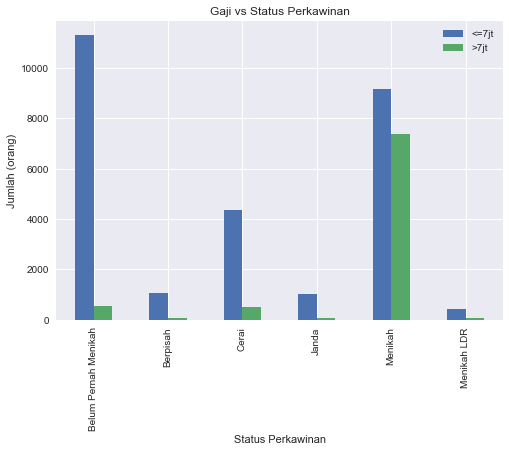

In [20]:
# Status perkawinan

status = pd.DataFrame(df_train.groupby('Gaji')['Status Perkawinan'].value_counts())
status.columns = ['Jumlah (orang)']
status.reset_index()
status = status.pivot_table(index='Status Perkawinan',columns='Gaji', values='Jumlah (orang)')
status_plot = status.plot(kind='bar').set(title='Gaji vs Status Perkawinan', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(status)

terlihat bahwa yang menikah cenderung bergaji lebih dari 7 jt.
(masuk fitur)

Gaji           <=7jt  >7jt
Jenis Kelamin             
Laki2          16798  7296
Perempuan      10566  1334


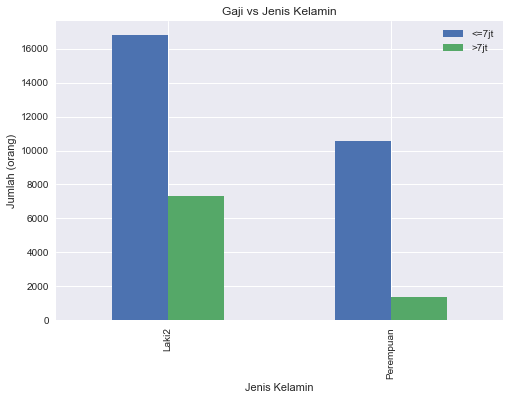

In [21]:
# Jenis kelamin

jk = pd.DataFrame(df_train.groupby('Gaji')['Jenis Kelamin'].value_counts())
jk.columns = ['Jumlah (orang)']
jk.reset_index()
jk = jk.pivot_table(index='Jenis Kelamin',columns='Gaji', values='Jumlah (orang)')
jk_plot = jk.plot(kind='bar').set(title='Gaji vs Jenis Kelamin', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(jk)

terlihat bahwa laki2 cenderung memiliki gaji yang lebih besar
kemungkinan karena jumlah yang disurvei lebih banyak daripada perempuan dan juga dipengaruhi oleh jenis pekerjaannya

tidak terlalu signifikan, tapi coba masukkan sbg fitur dulu

In [22]:
df_train['Keuntungan Kapital'].value_counts()

0.000000e+00    32982
2.103360e+08      378
1.076320e+08      301
1.021720e+08      278
1.399986e+09      174
                ...  
2.423400e+07        1
3.341800e+07        1
3.085600e+08        1
1.555400e+07        1
9.256800e+07        1
Name: Keuntungan Kapital, Length: 120, dtype: int64

In [23]:
df_train['Kerugian Capital'].value_counts()
# kebanyakan nilainya nol, drop saja kolom ini

0.0           34330
26628000.0      222
27678000.0      189
26418000.0      167
33810000.0       56
              ...  
2170000.0         1
51562000.0        1
19894000.0        1
2982000.0         1
26180000.0        1
Name: Kerugian Capital, Length: 96, dtype: int64

Gaji                  <=7jt    >7jt
Keuntungan Kapital                 
0.000000e+00        26210.0  6772.0
1.596000e+06            7.0     NaN
5.614000e+06            4.0     NaN
8.316000e+06           36.0     NaN
1.279600e+07            6.0     NaN
...                     ...     ...
3.533040e+08            NaN    14.0
3.895920e+08            NaN    46.0
4.773300e+08            4.0     NaN
5.783400e+08            3.0     NaN
1.399986e+09            NaN   174.0

[120 rows x 2 columns]


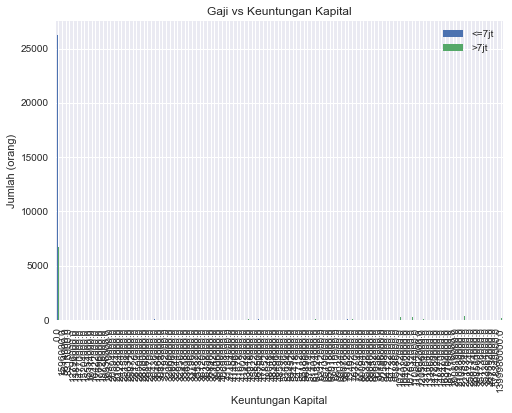

In [24]:
keuntungan = pd.DataFrame(df_train.groupby('Gaji')['Keuntungan Kapital'].value_counts())
keuntungan.columns = ['Jumlah (orang)']
keuntungan.reset_index()
keuntungan = keuntungan.pivot_table(index='Keuntungan Kapital',columns='Gaji', values='Jumlah (orang)')
keuntungan_plot = keuntungan.plot(kind='bar').set(title='Gaji vs Keuntungan Kapital', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(keuntungan)
# keuntungan = df_train['Keuntungan Kapital']
# kerugian = df_train['Kerugian Capital']
# fig, ax = plt.subplots(figsize=(12,8))
# ax = sns.scatterplot(data=df_train, x=keuntungan, y=keuntungan.value_counts(), hue='Gaji')
# plt.show()

keuntungan dan kerugian mostly gaada isinya jadi lebih baik tidak usah digunakan sebagai fitur

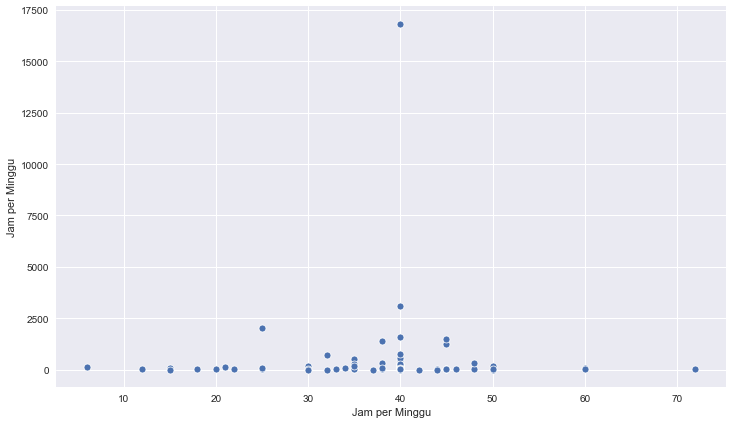

In [25]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(12,7))
ax = sns.scatterplot(data=df_train, x='Jam per Minggu', y=df_train['Jam per Minggu'].value_counts())
sns.despine()
plt.show()

Gaji            <=7jt  >7jt
Jam per Minggu             
1.0              15.0   3.0
2.0              31.0   7.0
3.0              41.0   2.0
4.0              62.0   4.0
5.0              60.0   7.0
...               ...   ...
95.0              NaN   1.0
96.0              8.0   1.0
97.0              1.0   1.0
98.0              9.0   3.0
99.0             73.0  28.0

[94 rows x 2 columns]
Gaji              <=7jt    >7jt
Jam per Minggu                 
40.0            13228.0  3614.0
50.0             1722.0  1377.0
45.0             1282.0   741.0
60.0              881.0   704.0
55.0              429.0   346.0
...                 ...     ...
81.0                1.0     NaN
87.0                1.0     NaN
88.0                3.0     NaN
91.0                1.0     NaN
94.0                1.0     NaN

[94 rows x 2 columns]


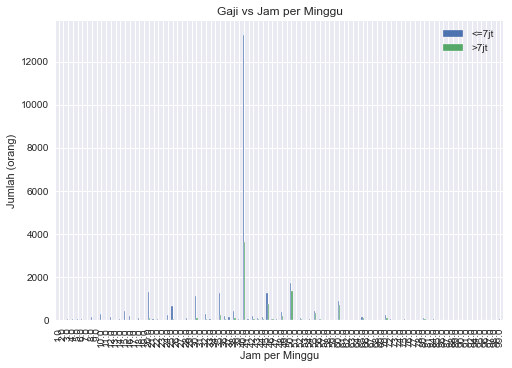

In [26]:
# Jam kerja

jam_kerja = pd.DataFrame(df_train.groupby('Gaji')['Jam per Minggu'].value_counts())
jam_kerja.columns = ['Jumlah (orang)']
jam_kerja.reset_index()
jam_kerja = jam_kerja.pivot_table(index='Jam per Minggu',columns='Gaji', values='Jumlah (orang)')
jam_kerja_plot = jam_kerja.plot(kind='bar').set(title='Gaji vs Jam per Minggu', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(jam_kerja)
print(jam_kerja.sort_values(by='>7jt', ascending=False))

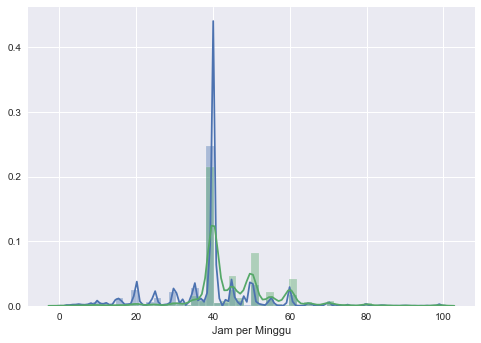

In [27]:
# distribusinya lebar juga, lumayan banyak 
# coba cek totalnya
# df_train['Jam per Minggu'].value_counts()
sns.distplot(df_train[df_train['Gaji'] == '<=7jt']['Jam per Minggu'])
sns.distplot(df_train[df_train['Gaji'] == '>7jt']['Jam per Minggu'])

Gaji  <=7jt  >7jt
Umur             
17    432.0   NaN
18    621.0   NaN
19    765.0   2.0
20    835.0   1.0
21    843.0   5.0
...     ...   ...
85      1.0   1.0
86      1.0   NaN
87      3.0   NaN
88      4.0   1.0
90     26.0   8.0

[73 rows x 2 columns]
Gaji  <=7jt   >7jt
Umur              
46    500.0  337.0
37    628.0  328.0
47    495.0  327.0
38    636.0  316.0
41    603.0  308.0
...     ...    ...
18    621.0    NaN
82     11.0    NaN
84     10.0    NaN
86      1.0    NaN
87      3.0    NaN

[73 rows x 2 columns]


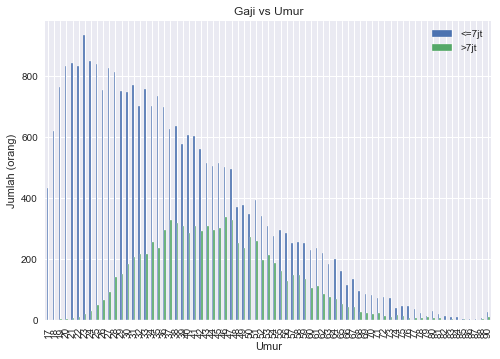

In [28]:
# Jam kerja

umur = pd.DataFrame(df_train.groupby('Gaji')['Umur'].value_counts())
umur.columns = ['Jumlah (orang)']
umur.reset_index()
umur = umur.pivot_table(index='Umur',columns='Gaji', values='Jumlah (orang)')
umur_plot = umur.plot(kind='bar').set(title='Gaji vs Umur', ylabel='Jumlah (orang)')
plt.legend(bbox_to_anchor=(1,1))
print(umur)
print(umur.sort_values(by='>7jt', ascending=False))

distribusi data dan pusat data berbeda utk tiap label gaji

In [29]:
df_train.groupby(['Gaji','Pekerjaan']).agg({'Jam per Minggu': 'mean','Umur': 'count'})

Jam per Minggu  Umur
Gaji  Pekerjaan                                  
<=7jt Asisten Rumah Tangga        32.788043   184
      Ekesekutif Managerial       42.971831  2343
      Mesin Inspeksi              40.550843  1957
      Pembersih                   37.544383  1442
      Pemuka Agama                37.181716  3555
      Penjaga                     41.309474   475
      Perbaikan Kerajinan         41.686805  3509
      Petani                      45.905759   955
      Sales                       38.156790  2953
      Servis Lainnya              34.496546  3474
      Spesialis                   36.446238  4399
      Supir                       43.691806  1379
      Tech-support                38.702186   732
      Tentara                     44.000000     7
>7jt  Asisten Rumah Tangga        30.000000     3
      Ekesekutif Managerial       47.374649  2138
      Mesin Inspeksi              43.368601   293
      Pembersih                   42.510204    98
      Pemuka Agama                40.927032   603
      Penjaga                     45.606635   211
      Perbaikan Kerajinan         44.375752   998
      Petani                      53.066116   121
      Sales                       47.665445  1091
      Servis Lainnya              42.574468   141
      Spesialis                   44.034559  2257
      Supir                       48.715470   362
      Tech-support                42.312903   310
      Tentara                     42.000000     4

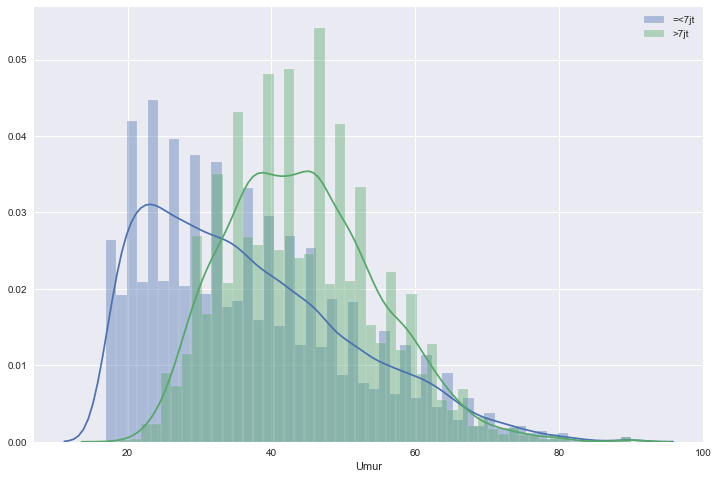

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.distplot(df_train[df_train['Gaji'] == '<=7jt']['Umur'], label='=<7jt')
ax=sns.distplot(df_train[df_train['Gaji'] == '>7jt']['Umur'], label='>7jt')
plt.legend()
plt.show()

umur 30-40 termasuk usia yang produktif

Jika kita lihat, persebaran data / distribusinya ada yg normal, skewed.
Jadikan distribusi normal

In [31]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


<center> <h2> Model 3 </h2> </center>
<h3> Feature Engineering 3 </h3> 

### after detailed exploratory data analysis
Fitur yang mempengaruhi
- Umur
- Pekerjaan
- Jmlh Tahun Pendidikan
- Status Perkawinan
- Jenis Kelamin
- Jam perminggu

Target
- Gaji

In [32]:
df_train_featured3 = df_train[['Umur','Jmlh Tahun Pendidikan','Status Perkawinan','Pekerjaan','Jenis Kelamin','Jam per Minggu']]
df_test_featured3 = df_test[['Umur','Jmlh Tahun Pendidikan','Status Perkawinan','Pekerjaan','Jenis Kelamin','Jam per Minggu']]

In [33]:
df_test_featured3.head()

,Umur,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Jam per Minggu
0,30,11,Cerai,Pemuka Agama,Perempuan,40.0
1,28,9,Menikah,Mesin Inspeksi,Laki2,50.0
2,34,10,Menikah,Pemuka Agama,Laki2,40.0
3,51,10,Menikah,Ekesekutif Managerial,Laki2,40.0
4,20,10,Belum Pernah Menikah,Spesialis,Perempuan,40.0


In [34]:
# encode label
# without ordinal : Pekerjaan, Jenis kelamin
df_train_featured3 = pd.get_dummies(df_train_featured3, columns=['Pekerjaan','Jenis Kelamin','Status Perkawinan'])
df_test_featured3 = pd.get_dummies(df_test_featured3, columns=['Pekerjaan','Jenis Kelamin','Status Perkawinan'])
df_test_featured3.head()

,Umur,Jmlh Tahun Pendidikan,Jam per Minggu,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,...,Pekerjaan_Tech-support,Pekerjaan_Tentara,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR
0,30,11,40.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,28,9,50.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,34,10,40.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,51,10,40.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,20,10,40.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [35]:
# Scaling
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

train_scaled3 = stdscaler.fit_transform(df_train_featured3)
test_scaled3 = stdscaler.fit_transform(df_test_featured3)

df_train_ready3 = pd.DataFrame(train_scaled3, columns=df_train_featured3.columns)
df_test_ready3 = pd.DataFrame(test_scaled3, columns=df_test_featured3.columns)
df_train_ready3.describe()

,Umur,Jmlh Tahun Pendidikan,Jam per Minggu,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,...,Pekerjaan_Tech-support,Pekerjaan_Tentara,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR
count,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,...,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04,3.599400e+04
mean,1.833608e-16,2.604647e-16,2.269674e-16,-5.734047e-16,-1.652842e-15,2.468465e-15,4.675489e-15,1.519994e-16,-1.655756e-15,-1.626347e-16,...,3.927930e-16,-1.789572e-15,-9.978929e-16,9.978929e-16,-1.033975e-16,-1.953501e-16,7.435169e-16,4.861675e-16,7.366077e-16,-1.031927e-15
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.584121e+00,-3.526470e+00,-3.188683e+00,-7.226647e-02,-3.770879e-01,-2.582218e-01,-2.114173e-01,-3.613957e-01,-1.393880e-01,-3.783364e-01,...,-1.726624e-01,-1.748428e-02,-1.422922e+00,-7.027794e-01,-7.006190e-01,-1.802790e-01,-3.949532e-01,-1.777997e-01,-9.230491e-01,-1.176002e-01
25%,-7.797964e-01,-4.194050e-01,-3.522621e-02,-7.226647e-02,-3.770879e-01,-2.582218e-01,-2.114173e-01,-3.613957e-01,-1.393880e-01,-3.783364e-01,...,-1.726624e-01,-1.748428e-02,-1.422922e+00,-7.027794e-01,-7.006190e-01,-1.802790e-01,-3.949532e-01,-1.777997e-01,-9.230491e-01,-1.176002e-01
50%,-1.217129e-01,-3.102188e-02,-3.522621e-02,-7.226647e-02,-3.770879e-01,-2.582218e-01,-2.114173e-01,-3.613957e-01,-1.393880e-01,-3.783364e-01,...,-1.726624e-01,-1.748428e-02,7.027794e-01,-7.027794e-01,-7.006190e-01,-1.802790e-01,-3.949532e-01,-1.777997e-01,-9.230491e-01,-1.176002e-01
75%,6.826114e-01,7.457444e-01,3.690631e-01,-7.226647e-02,-3.770879e-01,-2.582218e-01,-2.114173e-01,-3.613957e-01,-1.393880e-01,-3.783364e-01,...,-1.726624e-01,-1.748428e-02,7.027794e-01,1.422922e+00,1.427309e+00,-1.802790e-01,-3.949532e-01,-1.777997e-01,1.083366e+00,-1.176002e-01
max,3.753668e+00,2.299277e+00,4.735388e+00,1.383768e+01,2.651902e+00,3.872639e+00,4.729982e+00,2.767050e+00,7.174217e+00,2.643150e+00,...,5.791648e+00,5.719425e+01,7.027794e-01,1.422922e+00,1.427309e+00,5.546959e+00,2.531945e+00,5.624306e+00,1.083366e+00,8.503384e+00


In [36]:
df_train_target = df_train[['Gaji']].copy()
# encode
# gaji <=7jt ---- 0
# gaji >7jt ---- 1

gaji_dict = {'<=7jt':0,
            '>7jt':1}

df_train_target['Gaji'] = df_train_target['Gaji'].map(gaji_dict)

In [37]:
x_train3 = df_train_ready3
y_train = np.ravel(df_train_target) #dijadiin row
x_test3 = df_test_ready3
orang_id = df_test.id

In [38]:
# modelling
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [39]:
# RandomForestClassifier
rf = RandomForestClassifier()
param_rf = {
           'n_estimators' : np.arange(1,30),
           'max_depth' : np.arange(1,100),
           'max_features' : ['auto', 'sqrt'],
           'min_samples_leaf':np.arange(1,30),
           'random_state':np.arange(1,30)
             }
rf_gscv3 = RandomizedSearchCV(rf, param_rf, scoring='roc_auc', cv=10, return_train_score=True)
rf_gscv3.fit(x_train3, y_train)

print('Best parameters :\n{}\n'.format(rf_gscv3.best_params_))
print('Best score :\n{}\n'.format(rf_gscv3.best_score_))

# cek underfitting/overfitting
print('Mean train score :\n{}\n'.format(rf_gscv3.cv_results_['mean_train_score']))
print('Mean test score :\n{}\n'.format(rf_gscv3.cv_results_['mean_test_score']))

# pas fitur umur dihilangkan scorenya turun 1

Best parameters :
{'random_state': 1, 'n_estimators': 28, 'min_samples_leaf': 18, 'max_features': 'auto', 'max_depth': 87}

Best score :
0.8876521496543832

Mean train score :
[0.9027323  0.90165496 0.90239388 0.96076172 0.90247062 0.89746563
 0.89685275 0.90683468 0.89585014 0.89497224]

Mean test score :
[0.88661465 0.88765215 0.88635482 0.81873599 0.88470618 0.88467359
 0.88702801 0.87545688 0.88652679 0.79911624]



Tanpa fitur umur
Best parameters :
{'random_state': 2, 'n_estimators': 29, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 62}

Best score :
0.8781444766069603

Mean train score :
[0.92643971 0.89222527 0.87321186 0.88447371 0.89845802 0.88448047
 0.90587466 0.87641624 0.88351028 0.88469408]

Mean test score :
[0.85262637 0.87814448 0.87012907 0.87738129 0.87669828 0.87761235
 0.87374995 0.87063493 0.87752465 0.87765484]
 
---------------------
Dengan fitur umur
Best parameters :
{'random_state': 29, 'n_estimators': 23, 'min_samples_leaf': 17, 'max_features': 'auto', 'max_depth': 41}

Best score :
0.8875828206432941

Mean train score :
[0.9089895  0.8841432  0.9112133  0.93076511 0.89781398 0.89489403
 0.90186107 0.91449789 0.90690376 0.87658519]

Mean test score :
[0.88667458 0.86088709 0.88712709 0.88413463 0.88537973 0.88088642
 0.88758282 0.8857718  0.88656757 0.86426634]

In [40]:
result_rf3 = rf_gscv3.predict(x_test3)

result_rf3_csv = pd.DataFrame({'Id':orang_id,
                           'Gaji':result_rf3
                          })
result_rf3_csv.to_csv('rf3.csv', index = False)

## Insight

- jika skor model sudah mentok, setelah hyperparameter diutak/atik, tuning atau ganti model, berarti fiturnya harus dikaji ulang
- ambil fitur yang bener2 mempengaruhi, lihat berdasarkan eksplorasi data

---